<a href="https://colab.research.google.com/github/kmath22/kmath22/blob/main/Anova_Model_with_MC_Test_(from_Data_Science_Website).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anova for PYTHON FOR DATA SCIENCE


*   https://www.pythonfordatascience.org/anova-python/




In [2]:
import pandas as pd


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/difficile.csv")
df.drop('person', axis= 1, inplace= True)

# Recoding value from numeric to string
df['dose'].replace({1: 'placebo', 2: 'low', 3: 'high'}, inplace= True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dose    15 non-null     object
 1   libido  15 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes


In [5]:
df.head

<bound method NDFrame.head of        dose  libido
0   placebo       3
1   placebo       2
2   placebo       1
3   placebo       1
4   placebo       4
5       low       5
6       low       2
7       low       4
8       low       2
9       low       3
10     high       7
11     high       4
12     high       5
13     high       3
14     high       6>

In [ ]:
pip install researchpy

In [9]:
import researchpy as rp

In [10]:
rp.summary_cont(df['libido'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,libido,15.0,3.4667,1.7674,0.4563,2.4879,4.4454


In [11]:
rp.summary_cont(df['libido'].groupby(df['dose']))

,N,Mean,SD,SE,95% Conf.,Interval
dose,,,,,,
high,5,5.0,1.5811,0.7071,3.0368,6.9632
low,5,3.2,1.3038,0.5831,1.5811,4.8189
placebo,5,2.2,1.3038,0.5831,0.5811,3.8189


In [20]:
import scipy.stats as stats

stats.f_oneway(df['libido'][df['dose'] == 'high'],
               df['libido'][df['dose'] == 'low'],
               df['libido'][df['dose'] == 'placebo'])


F_onewayResult(statistic=5.11864406779661, pvalue=0.024694289538222603)

In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('libido ~ C(dose)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(dose),20.133333,2.0,5.118644,0.024694
Residual,23.600000,12.0,NaN,NaN


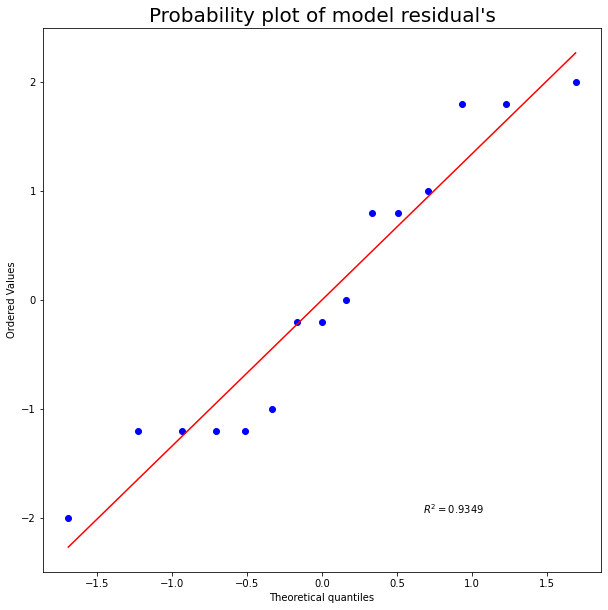

In [22]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

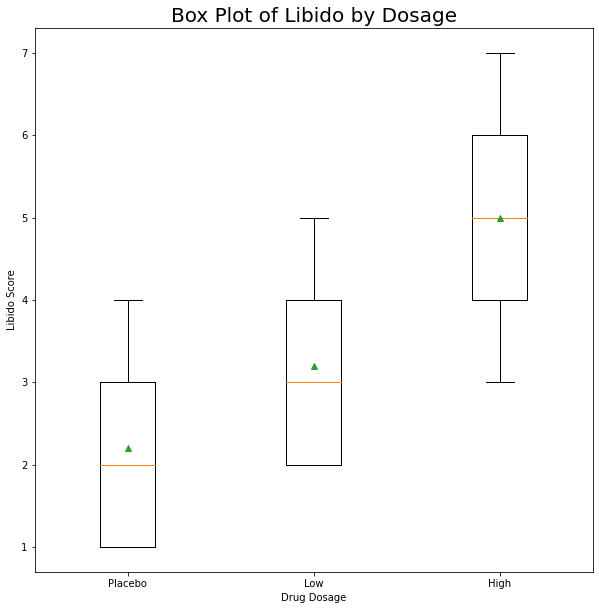

In [23]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Libido by Dosage", fontsize= 20)
ax.set

data = [df['libido'][df['dose'] == 'placebo'],
        df['libido'][df['dose'] == 'low'],
        df['libido'][df['dose'] == 'high']]

ax.boxplot(data,
           labels= ['Placebo', 'Low', 'High'],
           showmeans= True)

plt.xlabel("Drug Dosage")
plt.ylabel("Libido Score")

plt.show()

In [24]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(df['libido'], df['dose'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
high,low,-1.8,0.1472,-4.1651,0.5651,False
high,placebo,-2.8,0.0209,-5.1651,-0.4349,True
low,placebo,-1.0,0.5171,-3.3651,1.3651,False


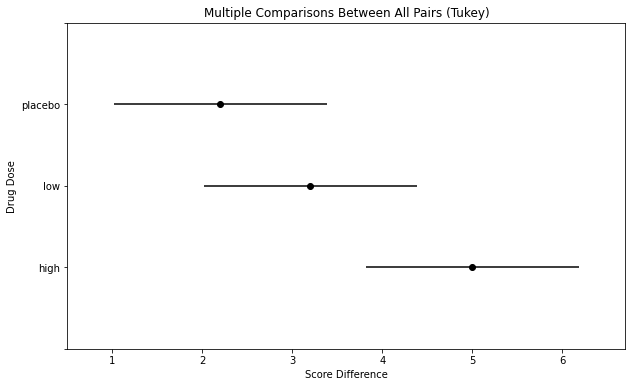

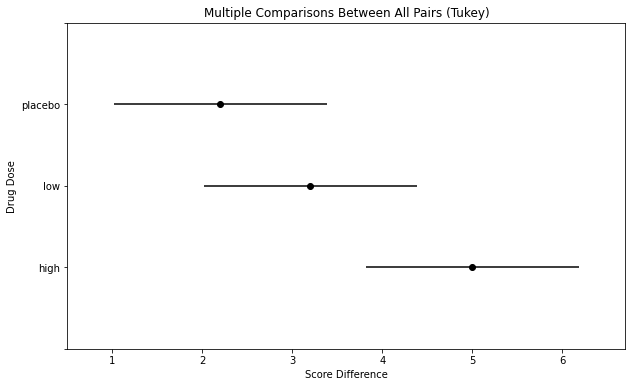

In [25]:
post_hoc_res.plot_simultaneous(ylabel= "Drug Dose", xlabel= "Score Difference")

In [27]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(df['libido'], df['dose'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "bonf")

tbl

group1,group2,stat,pval,pval_corr,reject
high,low,1.964,0.0851,0.2554,False
high,placebo,3.0551,0.0157,0.0471,True
low,placebo,1.2127,0.2598,0.7795,False
